# 청와대 국민청원
- 청와대 국민청원 추천순 청원 목록 크롤링을 통한 데이터 시각화
- https://www1.president.go.kr/petitions/best

## 1. 웹크롤링
### 1.1 필요한 모듈 import()

In [85]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys 

### 1.2. 웹크롤링

- 1페이지 가져오기

In [100]:
url = "https://www1.president.go.kr/petitions/best"
res = requests.get(url)
res.raise_for_status()
soup =BeautifulSoup(res.text, "lxml")
  
subjects = soup.find_all("div", class_="bl_body")[1].find_all("a")
#print(subjects)
for subject in subjects:
    title = subject.get_text()[3:]
    print(title)
    

남자친구에게 폭행당해 사망한 딸의 엄마입니다
부산대 **양의 위법한 입학 취소 결정 반대 합니다
20개월 여아를 끔찍하게 학대하고 성폭행하여 살해한 아동학대 살인자를 신상공개해주십시오
KTX로 수서까지 가고 싶습니다
60대 노인에게 담배셔틀'요구하고 작대기로 머리도 수차례 가격한 10대 강력 처벌…
가스라이팅 및 가정폭력으로 제 동생을 죽음으로 몰고 간 부사관의 처벌을 요구합니다
1급 중증장애인인 저희 아들이 인천소재 복지센터에서 악의적인 강제음식먹임 학대로 인한 기도…
대한민국을 지켜주세요
교회 대면예배금지  철회
16살 어린조카가 삶의 끈을 놓지 않게 도와주세요
여섬부정출혈(하혈)을 코로나19백신 부작용으로 신고할수있도록해주세요.
‘손도끼’를 들고 찾아온 상근 후임과, 전역한 선임의 강요로 인해 죽은 막내 동생의 억울함…
옷 가져가라고 불러서 이혼소송 중인 아내 살해한 가해자 신상공개 촉구합니다.
고위공직자 자녀 입시 부정 전수 조사 청원합니다.
<만24세 초등교사, 화이자 1차 접종 후 사경을 헤매고 있습니다. 저희 오빠 좀 도…


- 교수님 풀이

In [86]:
# 객체생성
driver = webdriver.Chrome('data4/chromedriver.exe')
driver.get("https://www1.president.go.kr/petitions/best")
driver.maximize_window()

In [87]:
# 팝업창 지우기
popup = driver.find_element_by_class_name("ppo_close_today")
popup.click()

In [88]:
driver.refresh()

In [101]:
soup = BeautifulSoup(driver.page_source, "lxml")

complaints = soup.find_all("div", class_="bl_body")[1]
complaints = complaints.find_all("div", class_="bl_subject")

result_list=[]

for complaint in complaints :
    #print(complaint.get_text().replace("제목","").strip())
    result_list.append(complaint.get_text().replace("제목","").strip())
    
result_list

['남자친구에게 폭행당해 사망한 딸의 엄마입니다',
 '부산대 **양의 위법한 입학 취소 결정 반대 합니다',
 '20개월 여아를 끔찍하게 학대하고 성폭행하여 살해한 아동학대 살인자를 신상공개해주십시오',
 'KTX로 수서까지 가고 싶습니다',
 "60대 노인에게 담배셔틀'요구하고 작대기로 머리도 수차례 가격한 10대 강력 처벌…",
 '가스라이팅 및 가정폭력으로 제 동생을 죽음으로 몰고 간 부사관의 처벌을 요구합니다',
 '1급 중증장애인인 저희 아들이 인천소재 복지센터에서 악의적인 강제음식먹임 학대로 인한 기도…',
 '대한민국을 지켜주세요',
 '교회 대면예배금지  철회',
 '16살 어린조카가 삶의 끈을 놓지 않게 도와주세요',
 '여섬부정출혈(하혈)을 코로나19백신 부작용으로 신고할수있도록해주세요.',
 '‘손도끼’를 들고 찾아온 상근 후임과, 전역한 선임의 강요로 인해 죽은 막내 동생의 억울함…',
 '옷 가져가라고 불러서 이혼소송 중인 아내 살해한 가해자 신상공개 촉구합니다.',
 '고위공직자 자녀 입시 부정 전수 조사 청원합니다.',
 '<만24세 초등교사, 화이자 1차 접종 후 사경을 헤매고 있습니다. 저희 오빠 좀 도…']

- 여러페이지 가져오기

In [102]:
for i in range(1,5):
    url = "https://www1.president.go.kr/petitions/best?page={}".format(i)
    res = requests.get(url)
    res.raise_for_status()
    soup =BeautifulSoup(res.text, "lxml")
    
    subjects = soup.find_all("div", class_="bl_body")[1].find_all("a")

    for subject in subjects:
        title = subject.get_text()[3:]
        #print(title)

- 교수님 풀이

In [105]:
result_list=[]

for i in range(1,11):
    driver.get("https://www1.president.go.kr/petitions/best?page={}".format(i))
    
    soup = BeautifulSoup(driver.page_source, "lxml")

    complaints = soup.find_all("div", class_="bl_body")[1]
    complaints = complaints.find_all("div", class_="bl_subject")

    for complaint in complaints :
        result_list.append(complaint.get_text().replace("제목","").strip())
    
result_list


['남자친구에게 폭행당해 사망한 딸의 엄마입니다',
 '부산대 **양의 위법한 입학 취소 결정 반대 합니다',
 '20개월 여아를 끔찍하게 학대하고 성폭행하여 살해한 아동학대 살인자를 신상공개해주십시오',
 'KTX로 수서까지 가고 싶습니다',
 "60대 노인에게 담배셔틀'요구하고 작대기로 머리도 수차례 가격한 10대 강력 처벌…",
 '가스라이팅 및 가정폭력으로 제 동생을 죽음으로 몰고 간 부사관의 처벌을 요구합니다',
 '1급 중증장애인인 저희 아들이 인천소재 복지센터에서 악의적인 강제음식먹임 학대로 인한 기도…',
 '대한민국을 지켜주세요',
 '교회 대면예배금지  철회',
 '16살 어린조카가 삶의 끈을 놓지 않게 도와주세요',
 '여섬부정출혈(하혈)을 코로나19백신 부작용으로 신고할수있도록해주세요.',
 '‘손도끼’를 들고 찾아온 상근 후임과, 전역한 선임의 강요로 인해 죽은 막내 동생의 억울함…',
 '옷 가져가라고 불러서 이혼소송 중인 아내 살해한 가해자 신상공개 촉구합니다.',
 '고위공직자 자녀 입시 부정 전수 조사 청원합니다.',
 '<만24세 초등교사, 화이자 1차 접종 후 사경을 헤매고 있습니다. 저희 오빠 좀 도…',
 '난민 받지 말아 주세요.',
 '집단 따돌림에 내 소중한 보물을 잃었습니다.',
 '저는 지금 아빠의 장례식장에 와있습니다.',
 '해머를 목에 달고 살다가 결국 사라진 검둥이, 학대자 처벌 강화',
 '화이자 백신 접종 2주만에 저희 아버지의 심장이 차갑게 멈춰버렸습니다.',
 '1953 금성 대전투’(원제 ‘금강천’)란 중국 영화 상영허가 취소를 청원합니다',
 '중학교 양궁부 선배가 후배를 활로 쏜 사건, 학교폭력 더 이상 두고 볼 수 없습니다.',
 '이틀동안 30명이랑 성관계 시켜 성노예 만들어 초대남 부르는 (트위터: **)을 강력처벌과…',
 '화이자 접종 후 예비신랑이 급성 골수성 백혈병에 걸렸습니다.',
 '인지세법 개정이 필요합니다!!',
 '(만22세) 화이자 1차접종 후 의식불명',
 '“ 고가주택

## 2. 데이터 프레임으로 저장

In [110]:
import pandas as pd
df = pd.DataFrame(result_list)

df.to_csv('data4/complaints.csv', index=False)

In [112]:
df = pd.read_csv('data4/complaints.csv')
df

,0
0,남자친구에게 폭행당해 사망한 딸의 엄마입니다
1,부산대 **양의 위법한 입학 취소 결정 반대 합니다
2,20개월 여아를 끔찍하게 학대하고 성폭행하여 살해한 아동학대 살인자를 신상공개해주십시오
3,KTX로 수서까지 가고 싶습니다
4,60대 노인에게 담배셔틀'요구하고 작대기로 머리도 수차례 가격한 10대 강력 처벌…
...,...
145,얀센후 뇌출혈
146,**동 살인사건 범죄자에대한 엄중한 처벌을 원합니다.
147,분양가 기준 높이겠다는 미친 국토부를 고발합니다.
148,코로나19 백신 부작요


## 3. 데이터 가공

### 3.1. koNLPy 환경설정
- 한국어 자연어 처리를 위한 파이썬 패키지
- https://konlpy-ko.readthedocs.io/ko/v0.4.3/
1. JAVA 설치 : 기본적으로 JAVA로 만들어진 내용을 파이썬으로 실행할 수 있게 되어있다.   
    - https://www.oracle.com/technetwork/java/javase/downloads/index.html 프로그램 다운로드 후 설치
    - 환경변수 설정(고급시스템설정) JAVA_HOME
2. JPYPE 설치 : 파이썬과 자바를 연결하기 위해 필요
    - 파이썬 버전 확인 (import sys , sys.version)
    - https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 다운로드
    - pip install <jpype파일명> 
3. konlpy 설치 : !pip install konlpy

In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [2]:
!pip install konlpy

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-4.9.3


In [113]:
from konlpy.tag import Kkma


# 첫페이지 품사 태깅 클래스 간 비교
kkma = Kkma()

# 텍스트를 문장별로 반환
print(kkma.sentences('안녕하세요. 반갑습니다. 저는 대한민국 국민입니다.'))

# 명사로 나누기
print(kkma.nouns('안녕하세요. 반갑습니다. 저는 대한민국 국민입니다.'))


['안녕하세요.', '반갑습니다.', '저는 대한민국 국민입니다.']
['안녕', '저', '대한', '대한민국', '민국', '국민']


In [116]:
print(kkma.nouns('''세계에서 13번째로 많이 사용되는 언어인 한국어 는 아름답지만 복잡한 언어입니다. 무수한 한국어 형태소 분석기 도구 는 미로 같은 텍스트에서 의미 있는 특징을 계산적으로 추출하기 위해 수많은 연구자에 의해 구축되었습니다.
                    KoNLPy는 단순히 또 다른 것을 만드는 것이 아니라, 하나가 되어 그들의 어깨 위에 서서 한 걸음 더 나아가는 것입니다. 특히 Python(프로그래밍) 언어로 구축되었습니다. 언어의 단순성과 우아함뿐만 아니라 강력한 문자열 처리 모듈과 크롤링, 웹 프로그래밍 및 데이터 분석을 포함한 다양한 작업에 대한 적용 가능성 때문입니다.
                    이 프로젝트의 세 가지 주요 철학은 다음과 같습니다.'''))

print(kkma.sentences('''세계에서 13번째로 많이 사용되는 언어인 한국어 는 아름답지만 복잡한 언어입니다. 무수한 한국어 형태소 분석기 도구 는 미로 같은 텍스트에서 의미 있는 특징을 계산적으로 추출하기 위해 수많은 연구자에 의해 구축되었습니다.
                    KoNLPy는 단순히 또 다른 것을 만드는 것이 아니라, 하나가 되어 그들의 어깨 위에 서서 한 걸음 더 나아가는 것입니다. 특히 Python(프로그래밍) 언어로 구축되었습니다. 언어의 단순성과 우아함뿐만 아니라 강력한 문자열 처리 모듈과 크롤링, 웹 프로그래밍 및 데이터 분석을 포함한 다양한 작업에 대한 적용 가능성 때문입니다.
                    이 프로젝트의 세 가지 주요 철학은 다음과 같습니다.'''))

['세계', '13', '13번째', '번째', '사용', '언어', '한국어', '무수', '형태소', '분석기', '도구', '미로', '텍스트', '의미', '특징', '계산', '추출', '연구자', '구축', '하나', '그', '어깨', '위', '서서', '걸음', '프로그래밍', '단순성', '우', '우아함', '아함', '문자열', '처리', '모듈', '크롤링', '웹', '데이터', '분석', '포함', '다양', '작업', '적용', '가능성', '때문', '이', '프로젝트', '가지', '주요', '철학', '다음']
['세계에서 13 번째로 많이 사용되는 언어인 한국어 는 아름답지만 복잡한 언어입니다.', '무수한 한국어 형태소 분석기 도구 는 미로 같은 텍스트에서 의미 있는 특징을 계산적으로 추출하기 위해 수많은 연구자에 의해 구축되었습니다.', 'KoNLPy는 단순히 또 다른 것을 만드는 것이 아니라, 하나가 되어 그들의 어깨 위에 서서 한 걸음 더 나아가는 것입니다.', '특히 Python( 프로그래밍) 언어로 구축되었습니다.', '언어의 단순성과 우 아함뿐만 아니라 강력한 문자열 처리 모듈과 크롤링, 웹 프로그래밍 및 데이터 분석을 포함한 다양한 작업에 대한 적용 가능성 때문입니다.', '이 프로젝트의 세 가지 주요 철학은 다음과 같습니다.']


### 3.2 단어갯수 구하기

In [121]:
import pandas as pd 

data = ['가', '나', '다', '라', '가', '가']
df = pd.DataFrame(columns=['text','cnt'])

for key in data :
    df = df.append({'text':key, 'cnt':1}, ignore_index=True)

df.groupby('text').sum()


,cnt
text,
가,3
나,1
다,1
라,1


In [126]:
import collections

print (collections.Counter(['가', '나', '다', '라', '가', '가']))
print (collections.Counter(['가', '나', '다', '라', '가', '가','가','가자','다']))

for key, value in collections.Counter(['가', '나', '다', '라', '가', '가','가','가자','다']).items():
    print(key,':',value)
    
list_a = ['가', '나', '다', '라', '가', '가']
list_b = ['가', '나', '다', '라', '가', '가','가','가자','다']
list_c = list_a+list_b

print(collections.Counter(list_c))
print(collections.Counter(list_c).most_common(3))

Counter({'가': 3, '나': 1, '다': 1, '라': 1})
Counter({'가': 4, '다': 2, '나': 1, '라': 1, '가자': 1})
가 : 4
나 : 1
다 : 2
라 : 1
가자 : 1
Counter({'가': 7, '다': 3, '나': 2, '라': 2, '가자': 1})
[('가', 7), ('다', 3), ('나', 2)]


### 3.3 텍스트 가공하기

In [131]:
from konlpy.tag import Kkma
import collections

kkma = Kkma()

list_sentence = ["저는 여자친구가 있습니다",
                "저는 남자친구가 있습니다",
                "아버지가 방에 들어가신다",
                "아버지가방에 들어가신다",
                "인생은 뭘까요",
                "돈 많은 백수가 되고싶다",
                "건물주가 되고싶다",
                "일더하기 일은 귀요미",
                "이더하기 이는 귀요미",
                "삼더하기 삼은 귀요미 귀요미"]


nouns_list = []
for i in list_sentence :
    nouns_list += kkma.nouns(i)
    print(nouns_list)
    print('-'*80)

print('final :',nouns_list)
collections.Counter(nouns_list).most_common(5)

['여자', '여자친구', '친구']
--------------------------------------------------------------------------------
['여자', '여자친구', '친구', '남자', '남자친구', '친구']
--------------------------------------------------------------------------------
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방']
--------------------------------------------------------------------------------
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방', '아버지', '아버지가방', '가방']
--------------------------------------------------------------------------------
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방', '아버지', '아버지가방', '가방', '인생', '무엇']
--------------------------------------------------------------------------------
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방', '아버지', '아버지가방', '가방', '인생', '무엇', '돈', '백수']
--------------------------------------------------------------------------------
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방', '아버지', '아버지가방', '가방', '인생', '무엇', '돈', '백수', '건물주']
----------------------------------

[('더하기', 3), ('귀요', 3), ('귀요미', 3), ('미', 3), ('친구', 2)]

### 3.4. 실제 데이터 가공

In [133]:
result_list
nouns_list = []
for i in result_list:
    nouns_list += kkma.nouns(i)
#print('final :',nouns_list)

# df로 불러왔을때
temp=['123']
for i in range(len(df.index)):
    temp += kkma.nouns(df.iloc[i,0])
print(temp)

['나', '다', '라']


- 단어로 쪼개기

In [135]:
print(nouns_list)

['남자', '남자친구', '친구', '폭행', '사망', '딸', '엄마', '부산', '부산대', '대', '양의', '위법', '입학', '취소', '결정', '반대', '20', '20개월', '개월', '여아', '학대', '성폭행', '살해', '아동', '아동학대', '살인', '신상', '신상공개', '공개', '수서', '60', '60대', '대', '노인', '담배', '담배셔틀', '셔틀', '요구', '작대기', '머리', '수차례', '가격', '10', '10대', '처벌', '가스', '가스라이팅', '라이팅', '가정', '가정폭력', '폭력', '저', '동생', '죽음', '간', '부', '부사관', '사관', '처벌', '요구', '1', '1급', '급', '중증', '중증장애인', '장애인', '저희', '아들', '인천', '인천소재', '소재', '복지', '복지센터', '센터', '악의', '악의적인', '적인', '강제', '강제음식', '음식', '학대', '기도', '대한', '대한민국', '민국', '교회', '대면', '대면예배금지', '예배', '금지', '철회', '16', '16살', '살', '조카', '삶', '끈', '여', '여섬부정출혈', '섬', '부정', '출혈', '하혈', '을', '코로나', '코로나19백신', '19', '백', '신', '부작용', '수', '신고', '손도끼', '상근', '후임', '전역', '선임', '강요', '막내', '동생', '옷', '이혼', '이혼소송', '소송', '중인', '아내', '살해', '가해자', '신상', '신상공개', '공개', '촉구', '고위', '고위공직자', '공직자', '자녀', '입시', '부정', '전수', '조사', '청원', '만', '만24세', '24', '세', '초등', '초등교사', '교사', '화', '화이자', '이자', '1', '1차', '차', '접종', '후', '사경', '저희', '오빠', '

In [139]:
print(len(nouns_list))
for i in nouns_list:
        if (len(i)==1) or i .isdigit():
            nouns_list.remove(i)
print(len(nouns_list))

1263
1258


- 한글자 단어 제외시키기

In [137]:
#print(len('가'))
#print(len('가나'))

print(len(nouns_list))
for i in nouns_list:
    
    if (len(i)==1):
        nouns_list.remove(i)

print(len(nouns_list))
















1558
1335


## 4. 데이터 시각화

### 4.1. plot

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# 폰트설정
plt.rcParams['font.family']='Malgun Gothic'

# - 부호가 깨질때
plt.rcParams['axes.unicode_minus'] = False

# 캔버스 사이즈 설정
plt.rcParams["figure.figsize"] = (12, 6)

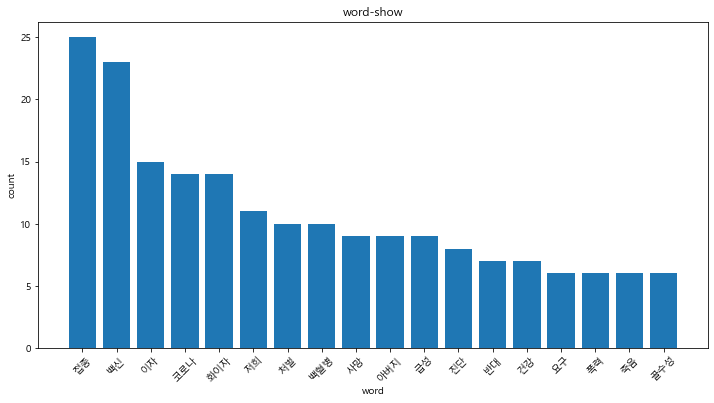

In [148]:
words = collections.Counter(nouns_list).most_common(18)

words_str = []
words_cnt = []

for s, n in words :
    words_str.append(s)
    words_cnt.append(n)
    
plt.bar(x= words_str, height= words_cnt)
plt.title('word-show')
plt.xlabel('word')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

### 4.2. 워드클라우드
-  메타 데이터에서 얻어진 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 늘어 놓아 웹 사이트에 표시하는 것.

In [149]:
!pip install wordcloud

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [152]:
with open('data5/us.txt') as f :
    text = f.read()
print(type(text))

<class 'str'>


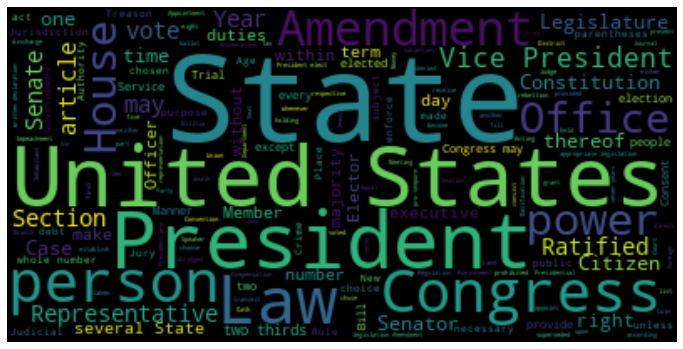

In [168]:
wordcloud = WordCloud().generate(text)
#print(wordcloud.words_)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')   # 축 안보이게

plt.savefig('data5/us.png')

(-0.5, 399.5, 199.5, -0.5)

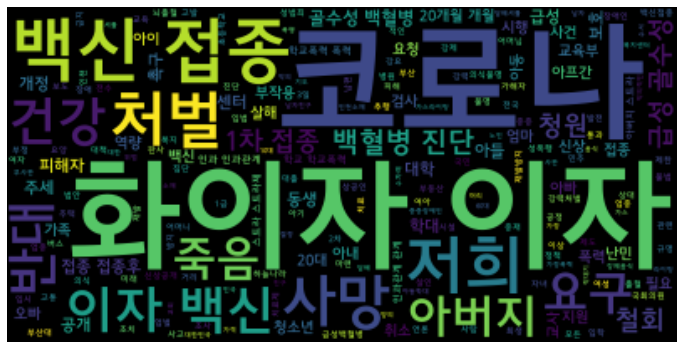

In [175]:
#nouns_list

text=''

for i in nouns_list:
    text += ' '+i

wordcloud = WordCloud(font_path='C://Windows/Fonts/JejuGothic.ttf').generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')

In [184]:
collections.Counter(nouns_list).most_common(30)

[('접종', 25),
 ('백신', 23),
 ('이자', 15),
 ('코로나', 14),
 ('화이자', 14),
 ('저희', 11),
 ('처벌', 10),
 ('백혈병', 10),
 ('사망', 9),
 ('아버지', 9),
 ('급성', 9),
 ('진단', 8),
 ('반대', 7),
 ('건강', 7),
 ('요구', 6),
 ('폭력', 6),
 ('죽음', 6),
 ('골수성', 6),
 ('철회', 5),
 ('청원', 5),
 ('1차', 5),
 ('학대', 4),
 ('공개', 4),
 ('동생', 4),
 ('아들', 4),
 ('센터', 4),
 ('촉구', 4),
 ('학교', 4),
 ('관계', 4),
 ('개정', 4)]

(-0.5, 399.5, 199.5, -0.5)

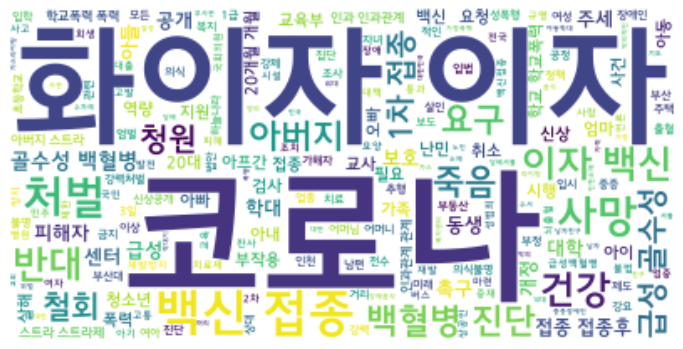

In [185]:
stopwords = ['저희', '급', '부분']
wordcloud = WordCloud(font_path='C://Windows/Fonts/JejuGothic.ttf',
                     background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')

In [188]:
from PIL import Image
import numpy as np

(782, 1280, 4)


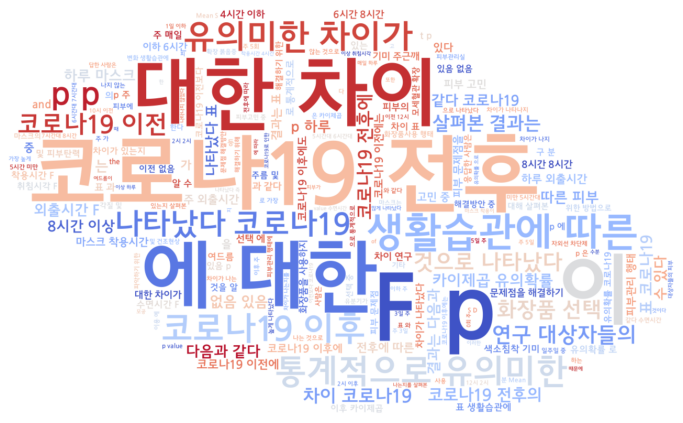

In [211]:
mask = np.array(Image.open('data5/cloud-37010_1280.png'))
print(mask.shape)
stopwords = ['저희', '급', '부분']
wordcloud = WordCloud(font_path='C://Windows/Fonts/JejuGothic.ttf',
                     background_color='white', 
                      stopwords=stopwords,
                     mask=mask,
                     colormap='coolwarm').generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')

plt.savefig('data5/wordcloud.png')

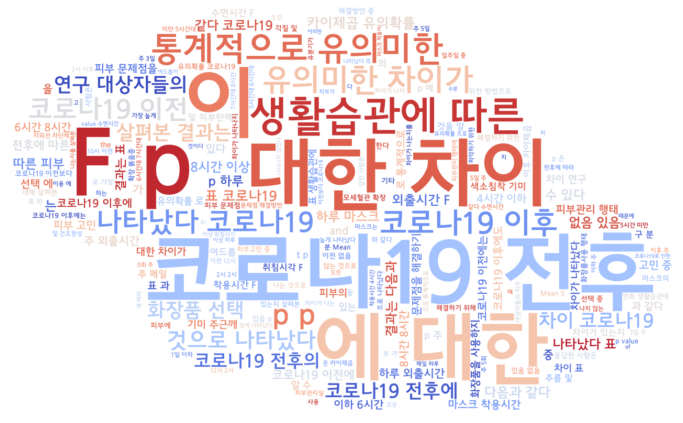

In [213]:
with open('data5/pr.txt', encoding='utf-8') as f :
    text = f.read()
#print(text)

wordcloud = WordCloud(font_path='C://Windows/Fonts/JejuGothic.ttf',
                     background_color='white', 
                      stopwords=stopwords,
                     mask=mask,
                     colormap='coolwarm').generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')   # 축 안보이게

plt.savefig('data5/wordcloud1.png')

In [215]:
from konlpy.tag import Kkma
with open('data5/pr.txt', encoding='utf-8') as f :
    text = f.read()
result_list = kkma.nouns(text)
print(result_list)

['저작자', '저작자표시', '표시', '비영리', '변경', '변경금지', '금지', '2.0', '대한', '대한민국', '민국', '이용자', '아래', '조건', '경우', '자유', '저작물', '복제', '배포', '전송', '전시', '공연', '방송', '수', '다음', '귀', '재', '재이용', '이용', '적용', '이용허락조건', '허락', '을', '나타내어', '저작권', '저작권자로', '자로', '별도', '허가', '저작권법', '권리', '위의', '내용', '영향', '이것', '이용허락규약', '규약', '이해', '요약', '귀하', '원', '원저작자', '영리', '목적', '개작', '변형', '가공', '방', '방산업학', '산업', '학', '석사', '석사학위', '학위', '논문', '코로나', '코로나19', '19', '마스크', '착용', '성인', '피부', '피부상태', '상태', '피부관리', '관리', '행태', '한방', '한방산업학과', '학과', '배', '성', '은', '지도', '지도교수', '교수', '권', '애', '2021', '2021년', '년', '2', '2월', '월', '대구', '대구한의대학교', '한의', '대학교', '한방산업대학원', '대학원', '한방산업학', '제출', '방산업학과', '한방피부미용', '미용', '전공', '배성은', '성은', '인준', '2020', '2020년', '12', '12월', '심사', '심사위원장', '위원장', '심', '사', '위', '감사', '글', '완성', '분', '도움', '글자', '마음', '표현', '부족', '2년', '시간', '시간동', '동', '안', '저', '지지', '격려', '주신', '문장', '의', '인사', '연구', '앞', '지도교수님', '교수님', '권애', '뜻', '전', '전합', '합', '니', '때', '존경', '영광', '었습', '점', '세심', '

In [219]:
print(len(result_list))
for i in result_list:
        if (len(i)==1) or i .isdigit():
            result_list.remove(i)
print(len(result_list))

2727
2368


In [220]:
print(len(result_list))
for i in result_list:
    
    if (len(i)==1):
        result_list.remove(i)

print(len(result_list))

2368
2317


In [221]:
collections.Counter(result_list).most_common(30)

[('시간', 2),
 ('고려', 2),
 ('평균', 2),
 ('박연하', 2),
 ('가지', 2),
 ('항목', 2),
 ('착용시간', 2),
 ('만큼', 2),
 ('저작자', 1),
 ('저작자표시', 1),
 ('표시', 1),
 ('비영리', 1),
 ('변경', 1),
 ('변경금지', 1),
 ('금지', 1),
 ('2.0', 1),
 ('대한', 1),
 ('대한민국', 1),
 ('민국', 1),
 ('이용자', 1),
 ('아래', 1),
 ('조건', 1),
 ('경우', 1),
 ('자유', 1),
 ('저작물', 1),
 ('복제', 1),
 ('배포', 1),
 ('전송', 1),
 ('전시', 1),
 ('공연', 1)]

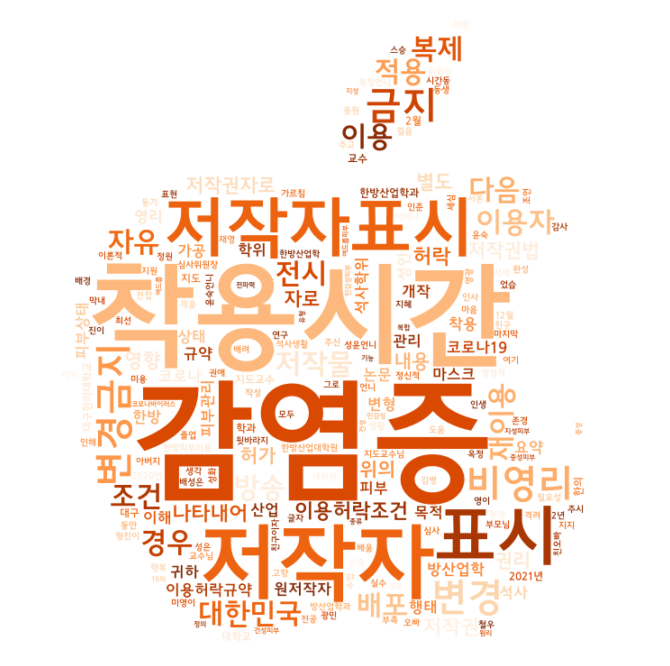

In [234]:
text=''

for i in result_list:
    text += ' '+i

mask = np.array(Image.open('data5/Apple Logo PNG - Free Download.jpg'))
stopwords = ['박연하', '가지', '항목','2.0','이러스','고려','만큼','대한','민국','아래','이것','있습','시간','평균','전송','공연']
wordcloud = WordCloud(font_path='C://Windows/Fonts/JejuGothic.ttf',
                     background_color='white', 
                      stopwords=stopwords,
                     mask=mask,
                     colormap='Oranges').generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')   # 축 안보이게

plt.savefig('data5/wordcloud2.png')